***Activity 6***

In [1]:
# import libraries needed for reading tabular data from a website
import pandas as pd
from bs4 import BeautifulSoup

In [7]:
# Save the file after reading it with BeautifulSoup to use in later steps
fd = open("countries2.htm", "r")
soup = BeautifulSoup(fd)
fd.close()

In [8]:
# Use findall method to see how many tables there are
all_tables = soup.find_all("table")
print("Total numer of tables: {}".format(len(all_tables)))

Total numer of tables: 0


In [56]:
# I have no idea why that didn't work, it's what the book says to do, I checked the solution, 
# it says the same thing. I'm going change my approach and use the actual url.

In [2]:
# import library needed to get the webpage
import requests

In [9]:
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
r  = requests.get(url)
data = r.text
soup = BeautifulSoup(data)

In [10]:
all_tables = soup.find_all("table")
print("Total numer of tables: {}".format(len(all_tables)))

Total numer of tables: 14


In [11]:
# Well that worked. I'm showing 14 tables, so now i'm supposed to find the "right" tables. I see
# that each of tables comes from a different source. The International Monetary Fund, the World
# Bank, and the United Nations. I didn't really know how to do this, so I followed the instruction
# in the solutions file, which didn't work, so I googled it and had to add the attrs= part to the 
# code to get the solution.

data_table = soup.find("table", attrs={"class": "wikitable"})
print(type(data_table))


<class 'bs4.element.Tag'>


In [12]:
# Separate source names from their data by first separating out the body from where to pull 
# the source.
sources = data_table.tbody.findAll('tr', recursive=False)[0]

In [13]:
# Then, creating a list containing the td data for each of the tables.
sources_list = [td for td in sources.findAll('td')]
print(len(sources_list))

3


In [14]:
sources_list

[<td style="width:33%; text-align:center"><b>Per the <a href="/wiki/International_Monetary_Fund" title="International Monetary Fund">International Monetary Fund</a> (2019 estimates)</b><sup class="reference" id="cite_ref-GDP_IMF_1-2"><a href="#cite_note-GDP_IMF-1">[1]</a></sup>
 </td>,
 <td style="width:33%; text-align:center;"><b>Per the <a href="/wiki/World_Bank" title="World Bank">World Bank</a> (2019)</b><sup class="reference" id="cite_ref-worldbank_21-0"><a href="#cite_note-worldbank-21">[20]</a></sup>
 </td>,
 <td style="width:33%; text-align:center;"><b>Per the <a href="/wiki/United_Nations" title="United Nations">United Nations</a> (2018)</b><sup class="reference" id="cite_ref-22"><a href="#cite_note-22">[21]</a></sup>
 </td>]

In [15]:
# Now pull out the source names, which are located under the <a> tag.
source_names = [source.findAll('a')[0].getText() for source in sources_list]
print(source_names)

['International Monetary Fund', 'World Bank', 'United Nations']


In [16]:
# Get the headers for the first source. Headers have the <th> tag and access the first table by 
# using the location of 0.
header1 = [th.getText().strip() for th in data_table[0][0].findAll('thead')[0].findAll('th')]
header1

KeyError: 0

In [17]:
# The code from the solutions file didn't work, so I googled it and will try something different.
t_headers = []
for th in data_table[0][0]:
    data_table.find_all("th")
    t_headers.append(th.getText().strip())

KeyError: 0

In [18]:
# Oh My Gosh! After hours of trying to figure this out, I finally figured out how to separate 
# The header from the first table. First, I found the table data listed under wikitable sortable
data = soup.find("table", attrs={"class": "wikitable sortable"})

In [163]:
# Next, I took the first sortable table data
first = data.tbody.findAll('tr', recursive=False)[0]
first

<tr>
<th data-sort-type="number" style="width:2em;">Rank</th>
<th>Country/Territory</th>
<th>GDP<br/>(US$million)
</th></tr>

In [170]:
# Then I separated out the headers
col_headers1 = [th.getText().strip() for th in first.findAll('th')]
col_headers1

['Rank', 'Country/Territory', 'GDP(US$million)']

In [174]:
# Separate the data without header
data1 = data.tbody.findAll('tr', recursive=False)[1:]

In [176]:
# Create a two dimentional list of the data witout headers (rows in the table)
df_data1 = [[td.getText().strip() for td in tr.findAll('td')] for tr in data1]
df_data1

[['', 'World[19]', '87,265,226'],
 ['1', 'United States', '21,439,453'],
 ['—', 'European Union[22][n 1]', '18,705,132'],
 ['2', 'China[n 2]', '14,140,163'],
 ['3', 'Japan', '5,154,475'],
 ['4', 'Germany', '3,863,344'],
 ['5', 'India', '2,935,570'],
 ['6', 'United Kingdom', '2,743,586'],
 ['7', 'France', '2,707,074'],
 ['8', 'Italy', '1,988,636'],
 ['9', 'Brazil', '1,847,020'],
 ['10', 'Canada', '1,730,914'],
 ['11', 'Russia[n 3]', '1,637,892'],
 ['12', 'South Korea', '1,629,532'],
 ['13', 'Spain', '1,397,870'],
 ['14', 'Australia', '1,376,255'],
 ['15', 'Mexico', '1,274,175'],
 ['16', 'Indonesia', '1,111,713'],
 ['17', 'Netherlands', '902,355'],
 ['18', 'Saudi Arabia', '779,289'],
 ['19', 'Turkey', '743,708'],
 ['20', 'Switzerland', '715,360'],
 ['—', 'Taiwan', '586,104'],
 ['21', 'Poland', '565,854'],
 ['22', 'Thailand', '529,177'],
 ['23', 'Sweden', '528,929'],
 ['24', 'Belgium', '517,609'],
 ['25', 'Iran', '458,500'],
 ['26', 'Austria', '447,718'],
 ['27', 'Nigeria', '446,543'],
 [

In [177]:
# Create a pandas dataframe using the header and row data
df1 = pd.DataFrame(df_data1, columns=col_headers1)
df1.head()

,Rank,Country/Territory,GDP(US$million)
0,,World[19],"87,265,226"
1,1,United States,"21,439,453"
2,—,European Union[22][n 1],"18,705,132"
3,2,China[n 2],"14,140,163"
4,3,Japan,"5,154,475"


In [178]:
# Now repeat those steps for the other two tables. 
second = data.tbody.findAll('tr', recursive=False)[1]
second

<tr style="font-weight:bold;background:#eaecf0">
<td data-sort-value="-1"> </td>
<td data-sort-value=""><span class="flagicon" style="padding-left:25px;"> </span><i><a href="/wiki/Gross_world_product" title="Gross world product">World</a></i><sup class="reference" id="cite_ref-IMF_Groups_20-1"><a href="#cite_note-IMF_Groups-20">[19]</a></sup></td>
<td align="right">87,265,226
</td></tr>

In [ ]:
# I could not figure out how to get to the second table using the code I had written to get the  
# first and the code in the solutions file didn't work at all, probably because I was using the
# actual website instead of the html file from Github, but I couldn't make that work. So I'm 
# kinda stuck here and after spending a great deal of time on this, I determined, I just need to 
# move on.

***Activity 8***

In [39]:
# import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Read in file using pandas
file = pd.read_excel("visit_data.xlsx")
file.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [24]:
# Check for duplicates using the email column since it is the most unique identifier in the data set
print(any(file['email'].duplicated()))

False


In [27]:
# Use a for loop to print out how many NaN values each column has because I'm not sure what is an essential column yet
for col in file.columns:
    miss = file[col].isnull().sum()
    if miss>0:
        print("{} has {} missing values(s)".format(col, miss))

first_name has 296 missing values(s)
last_name has 296 missing values(s)
gender has 505 missing values(s)
visit has 26 missing values(s)


In [30]:
# Ok, after peeking at the solution, I probably should be trying to use the stuff we learned in this chapter instead of 
# for loops. I also found out the essential columns. So i'm going to put that code here too. I also had to look up the
# difference between %r and %s does. 
print("Email column contains NaN - %r " % df.email.isnull().values.any())
print("IP Address column contains NaN - %s " % df.ip_address.isnull().values.any())
print("Visit column contains NaN - %s " % df.visit.isnull().values.any())

Email column contains NaN - False 
IP Address column contains NaN - False 
Visit column contains NaN - True 


In [37]:
# Now since we have missing values in the visit column, which is essential, we need to remove them. I will use isfinite
# to identify all non-NaN values and subset them 
file_without_Nans = file[np.isfinite(file['visit'])] 
file_without_Nans

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0
...,...,...,...,...,...,...,...
994,995,NaN,NaN,hlowethrm@army.mil,Female,104.234.36.172,747.0
995,996,Averil,Pickover,apickoverrn@vk.com,Male,10.45.16.167,1305.0
996,997,Walton,Hallewell,whallewellro@nasa.gov,NaN,231.224.238.232,2531.0
998,999,Sapphira,Terron,sterronrq@wordpress.org,NaN,24.77.234.208,250.0


In [42]:
# Now I will report the size difference between the two data frames, which I know from my previous code, should be 26
print(len(file)-len(file_without_Nans), "rows have been removed due to NaN values.")

26 rows have been removed due to NaN values.


{'whiskers': [<matplotlib.lines.Line2D at 0x18c51ef5ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x18c51f0e1c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18c51ef5760>],
 'medians': [<matplotlib.lines.Line2D at 0x18c51f0e880>],
 'fliers': [<matplotlib.lines.Line2D at 0x18c51f0eb80>],
 'means': []}

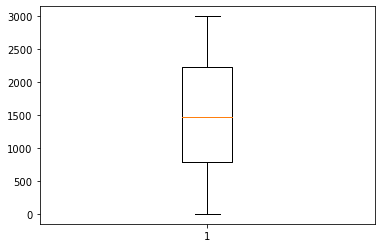

In [40]:
# Use a boxplot to identify any possible outliers in the number of visits
plt.boxplot(file_without_Nans['visit'])

In [43]:
# The solutions file states that anything above 2900 or below 100 should be considered outliers. So i will use 
# subsetting to remove those rows. 
file_clean = file_without_Nans[(file_without_Nans['visit']>100) & (file_without_Nans['visit']<2900)]
file_clean

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0
...,...,...,...,...,...,...,...
994,995,NaN,NaN,hlowethrm@army.mil,Female,104.234.36.172,747.0
995,996,Averil,Pickover,apickoverrn@vk.com,Male,10.45.16.167,1305.0
996,997,Walton,Hallewell,whallewellro@nasa.gov,NaN,231.224.238.232,2531.0
998,999,Sapphira,Terron,sterronrq@wordpress.org,NaN,24.77.234.208,250.0


In [44]:
# Note the size difference after removing extreme values
print(len(file)-len(file_without_Nans), "rows were removed due to NaN values.")
print(len(file_without_Nans)-len(file_clean), "rows were removed due to extreme values.")

26 rows were removed due to NaN values.
51 rows were removed due to extreme values.


***Exercise 3***

In [10]:
# Import necessary libraries
import sqlite3
import pandas as pd

In [14]:
# Create a query that will be used to insert headers and define fields of a SQL Lite database named test
query = '''CREATE TABLE test
(Name VARCHAR(20), Address VARCHAR(30), City VARCHAR(20), State VARCHAR(2), Zip INTEGER, Phone Number VARCHAR(11));'''

In [15]:
# Connect to SQL Lite
con = sqlite3.connect('mydata.sqlite')

In [16]:
# Execute my query on the SQL Lite database, which inserts the headers of a table
con.execute(query)

In [17]:
# Commit my changes
con.commit()

In [18]:
# Create the data that will populate the rows
data = [('John Smith', '21223 E Oak St', 'Byers', 'CO', 80001, '303-220-7867'),
       ('Jane Doe', '1234 Elm Street', 'Denver', 'CO', 81115, '720-444-8787'), 
       ('Missy Eliot', '56 Arbuckle Avenue', 'Los Angelas', 'CA', 54321, '806-576-1123'),
       ('Donald Trump', '112 Pennsylvania Ave', 'Washington DC', 'DC', 90090, '432-6565-0000'),
       ('Ally Brown', '8282 Cardinal Street', 'Spokane', 'WA', 42232, '818-777-5555'),
       ('Armando Lopez', '212 S Parnell St', 'San Antonio', 'TX', 22121, '202-334-5678'),
       ('Elouise Smith', '287 Coppertown Rd', 'Dallas', 'TX', 77898, '202-443-2343'),
       ('Sean O"Connery', '76 Hollywood Blvd', 'Hollywood', 'CA', 65437, '666-909-8888'),
       ('Seymore Butts', '89912 E Fairfield Ave', 'Fairfield', 'IL', 90012, '421-765-0980'),
       ('Bart Simpson', '2213 Imagination Lane', 'Lansing', 'MI', 32594, '255-478-3794')]

In [22]:
# Create the statement that will insert the values into the test database
stmt = "INSERT INTO test Values(?,?,?,?,?,?)"

In [29]:
# Enter the data into the database
con.executemany(stmt, data)

In [30]:
# Commit my changes
con.commit()

In [31]:
# Create a query that will select items from the test database
cursor = con.execute('select * from test')

In [32]:
# Create a variable that will house all the rows from the database after conducting the query
rows = cursor.fetchall()
rows

[('John Smith', '21223 E Oak St', 'Byers', 'CO', 80001, '303-220-7867'),
 ('Jane Doe', '1234 Elm Street', 'Denver', 'CO', 81115, '720-444-8787'),
 ('Missy Eliot',
  '56 Arbuckle Avenue',
  'Los Angelas',
  'CA',
  54321,
  '806-576-1123'),
 ('Donald Trump',
  '112 Pennsylvania Ave',
  'Washington DC',
  'DC',
  90090,
  '432-6565-0000'),
 ('Ally Brown',
  '8282 Cardinal Street',
  'Spokane',
  'WA',
  42232,
  '818-777-5555'),
 ('Armando Lopez',
  '212 S Parnell St',
  'San Antonio',
  'TX',
  22121,
  '202-334-5678'),
 ('Elouise Smith', '287 Coppertown Rd', 'Dallas', 'TX', 77898, '202-443-2343'),
 ('Sean O"Connery',
  '76 Hollywood Blvd',
  'Hollywood',
  'CA',
  65437,
  '666-909-8888'),
 ('Seymore Butts',
  '89912 E Fairfield Ave',
  'Fairfield',
  'IL',
  90012,
  '421-765-0980'),
 ('Bart Simpson',
  '2213 Imagination Lane',
  'Lansing',
  'MI',
  32594,
  '255-478-3794'),
 ('John Smith', '21223 E Oak St', 'Byers', 'CO', 80001, '303-220-7867'),
 ('Jane Doe', '1234 Elm Street', 'Den

In [ ]:
# Well I'm not sure why it didn't display all rows the same as the first two, but at least I got them. 
# I did notice however, that the fetchall actually takes the data out of the database, not just copying it. 